# Explore the Data

## Load the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [28]:
df = pd.read_csv('last_news_final.csv')

In [29]:
df.head()

,title,date,url
0,Nur Otan-да екі аудандағы АӘК-тің таратылуында...,22:27 2019-08-17,https://kaz.zakon.kz/news/4981980-nur-otan-da-...
1,Асқар Мамин Арыс қаласын қалпына келтіру жұмыс...,18:16 2019-08-17,https://kaz.zakon.kz/news/4981971-as-ar-mamin-...
2,Түркістанда шығыстық үлгідегі автобекет ашылды,15:25 2019-08-17,https://kaz.zakon.kz/news/4981963-t-rk-standa-...
3,Бүгін арыстықтар 100 мың теңге жәрдемақыны алды,20:21 2019-08-16,https://kaz.zakon.kz/news/4981913-b-g-n-arysty...
4,АҚШ-тың санкциялары Ресейдің мұнайына деген сұ...,17:54 2019-08-16,https://kaz.zakon.kz/news/4981898-a-sh-ty-sank...


In [30]:
df.shape

(135, 3)

In [31]:
df.tail()

,title,date,url
130,Тоқаев Сооронбай Жээнбековпен телефон арқылы с...,10:03 2019-08-09,https://kaz.zakon.kz/news/4980848-to-aev-sooro...
131,Дайын отыр! Атамбаевты неге жығып бермеу керек,09:50 2019-08-09,https://kaz.zakon.kz/news/4980845-dayyn-otyr-a...
132,Диана кайф. Жалаңаштанған қазақ қызы жұрттың ж...,09:31 2019-08-09,https://kaz.zakon.kz/news/4980839-diana-kayf-z...
133,Алматыда Toyota адам қағып кетті,09:18 2019-08-09,https://kaz.zakon.kz/news/4980835-almatyda-toy...
134,Атамбаев өз еркімен берілді,08:59 2019-08-09,https://kaz.zakon.kz/news/4980831-atambaev-z-e...


## Creating a Wordcloud

Now let us visually see which are the words that are most prominent. This requires us to find all the words in the `title` and create a frequency count for how many times the word occurs.

In [32]:
import nltk
from wordcloud import WordCloud

## Tokenization

Tokenization segments a document into its atomic elements. In this case, we are interested in tokenizing to words. 
First we need to break the sentence in to words. This process is called **tokenization**

In [33]:
sentence = df["title"][0]
sentence

'Nur Otan-да екі аудандағы АӘК-тің таратылуындағы заң бұзушылықтар қаралды'

In [34]:
tokens = nltk.wordpunct_tokenize(sentence)
tokens

['Nur',
 'Otan',
 '-',
 'да',
 'екі',
 'аудандағы',
 'АӘК',
 '-',
 'тің',
 'таратылуындағы',
 'заң',
 'бұзушылықтар',
 'қаралды']

Let us take all the sentence in the dataframe and tokenize to find the words, and get a frequency of count of each 
words

In [35]:
frequency_words = {}

In [36]:
for data in df['title']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token in frequency_words:
            count = frequency_words[token]
            count = count + 1
            frequency_words[token] = count
        else:
            frequency_words[token] = 1

In [37]:
# Let us see the frequency_words for each word occuring
frequency_words

{'Nur': 2,
 'Otan': 2,
 '-': 24,
 'да': 4,
 'екі': 3,
 'аудандағы': 1,
 'АӘК': 1,
 'тің': 1,
 'таратылуындағы': 1,
 'заң': 1,
 'бұзушылықтар': 1,
 'қаралды': 1,
 'Асқар': 4,
 'Мамин': 3,
 'Арыс': 1,
 'қаласын': 1,
 'қалпына': 1,
 'келтіру': 1,
 'жұмыстарын': 1,
 'және': 3,
 'Түркістандағы': 1,
 'құрылыс': 2,
 'нысандарын': 1,
 'тексерді': 1,
 'Түркістанда': 1,
 'шығыстық': 1,
 'үлгідегі': 1,
 'автобекет': 1,
 'ашылды': 2,
 'Бүгін': 1,
 'арыстықтар': 1,
 '100': 2,
 'мың': 3,
 'теңге': 4,
 'жәрдемақыны': 2,
 'алды': 2,
 'АҚШ': 4,
 'тың': 1,
 'санкциялары': 1,
 'Ресейдің': 2,
 'мұнайына': 1,
 'деген': 4,
 'сұранысты': 1,
 'байқаусызда': 1,
 'өсіріп': 1,
 'жіберді': 1,
 'Елбасы': 3,
 'алдағы': 1,
 'сайлауға': 1,
 'партиялардың': 1,
 'даярлық': 1,
 'жұмысын': 1,
 'жеделдетуді': 1,
 'тапсырды': 1,
 '"': 35,
 'Бір': 1,
 'шындықты': 1,
 'айтайын': 1,
 '...".': 6,
 'Димаш': 1,
 'Қадыр': 1,
 'атасының': 1,
 'ескі': 1,
 'видеосын': 1,
 'парақшасына': 1,
 'жүктеді': 1,
 '2': 1,
 '3': 1,
 'сағат': 

In [38]:
# Creating a Wordcloud
wordcloud = WordCloud()

In [39]:
wordcloud.generate_from_frequencies(frequency_words)

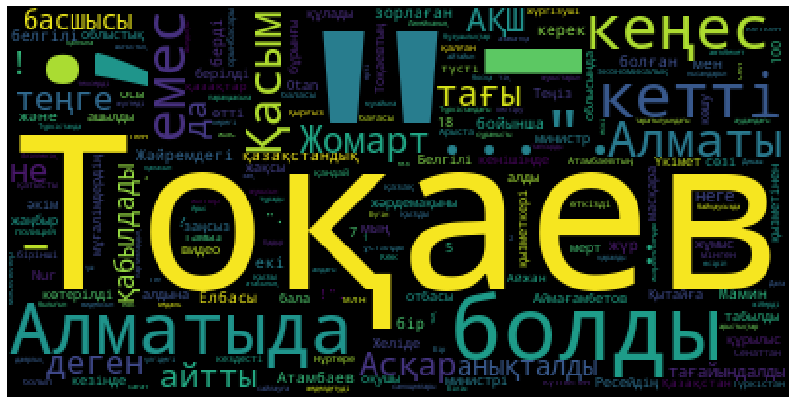

In [40]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Question - What are the two issue with this wordcloud?**

In [41]:
# Convert the dict to a dataframe
freq = pd.DataFrame.from_dict(frequency_words, orient = 'index')

In [42]:
# Let us sort them in descinding order
freq.sort_values(by = 0, ascending=False).head(10)

,0
"""",35
-,24
Тоқаев,13
",",11
.,11
болды,9
Алматыда,8
кеңес,6
"..."".",6
кетті,6


# Stopword Removal

Stop words are words which are filtered out before or after processing of natural language data. Though stop words usually refer to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search.

In [43]:
from nltk.corpus import stopwords
# nltk.download()

In [44]:
stop = stopwords.words('kazakh')

In [26]:
stop

['ах',
 'ох',
 'эх',
 'ай',
 'эй',
 'ой',
 'тағы',
 'тағыда',
 'әрине',
 'жоқ',
 'сондай',
 'осындай',
 'осылай',
 'солай',
 'мұндай',
 'бұндай',
 'мен',
 'сен',
 'ол',
 'біз',
 'біздер',
 'олар',
 'сіз',
 'сіздер',
 'маған',
 'оған',
 'саған',
 'біздің',
 'сіздің',
 'оның',
 'бізге',
 'сізге',
 'оларға',
 'біздерге',
 'сіздерге',
 'оларға',
 'менімен',
 'сенімен',
 'онымен',
 'бізбен',
 'сізбен',
 'олармен',
 'біздермен',
 'сіздермен',
 'менің',
 'сенің',
 'біздің',
 'сіздің',
 'оның',
 'біздердің',
 'сіздердің',
 'олардың',
 'маған',
 'саған',
 'оған',
 'менен',
 'сенен',
 'одан',
 'бізден',
 'сізден',
 'олардан',
 'біздерден',
 'сіздерден',
 'олардан',
 'айтпақшы',
 'сонымен',
 'сондықтан',
 'бұл',
 'осы',
 'сол',
 'анау',
 'мынау',
 'сонау',
 'осынау',
 'ана',
 'мына',
 'сона',
 'әні',
 'міне',
 'өй',
 'үйт',
 'бүйт',
 'біреу',
 'кейбіреу',
 'кейбір',
 'қайсыбір',
 'әрбір',
 'бірнеше',
 'бірдеме',
 'бірнеше',
 'әркім',
 'әрне',
 'әрқайсы',
 'әрқалай',
 'әлдекім',
 'әлдене',
 'әлдеқ

In [45]:
stop[0:10]

['ах', 'ох', 'эх', 'ай', 'эй', 'ой', 'тағы', 'тағыда', 'әрине', 'жоқ']

We will recreate the frequency words with two additional steps
- Remove all the stop words in our count
- Make every word lower case

In [46]:
frequency_words_wo_stop = {}
for data in df['title']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [47]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop)

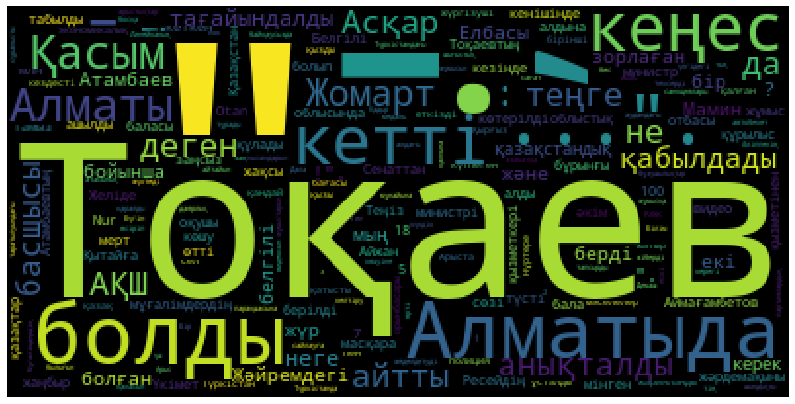

In [48]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can also extend the stopword list with common punctuations to even reomove those from the list

In [49]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [50]:
frequency_words_wo_stop = {}

In [51]:
def generate_word_frequency(row):
    data = row['title']
    tokens = nltk.wordpunct_tokenize(data)
    token_list = []
    for token in tokens:
        if token.lower() not in stop:
            token_list.append(token.lower())
            if token.lower() in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token.lower()]
                count = count + 1
                frequency_words_wo_stop[token.lower()] = count
            else:
                frequency_words_wo_stop[token.lower()] = 1
    
    return ','.join(token_list)

The `apply` function takes a function as its input and applies that across all the rows or columns

In [52]:
df['tokens'] = df.apply(generate_word_frequency,axis=1)

In [53]:
df.head()

,title,date,url,tokens
0,Nur Otan-да екі аудандағы АӘК-тің таратылуында...,22:27 2019-08-17,https://kaz.zakon.kz/news/4981980-nur-otan-da-...,"nur,otan,да,екі,аудандағы,аәк,тің,таратылуында..."
1,Асқар Мамин Арыс қаласын қалпына келтіру жұмыс...,18:16 2019-08-17,https://kaz.zakon.kz/news/4981971-as-ar-mamin-...,"асқар,мамин,арыс,қаласын,қалпына,келтіру,жұмыс..."
2,Түркістанда шығыстық үлгідегі автобекет ашылды,15:25 2019-08-17,https://kaz.zakon.kz/news/4981963-t-rk-standa-...,"түркістанда,шығыстық,үлгідегі,автобекет,ашылды"
3,Бүгін арыстықтар 100 мың теңге жәрдемақыны алды,20:21 2019-08-16,https://kaz.zakon.kz/news/4981913-b-g-n-arysty...,"бүгін,арыстықтар,100,мың,теңге,жәрдемақыны,алды"
4,АҚШ-тың санкциялары Ресейдің мұнайына деген сұ...,17:54 2019-08-16,https://kaz.zakon.kz/news/4981898-a-sh-ty-sank...,"ақш,тың,санкциялары,ресейдің,мұнайына,деген,сұ..."


In [54]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop)

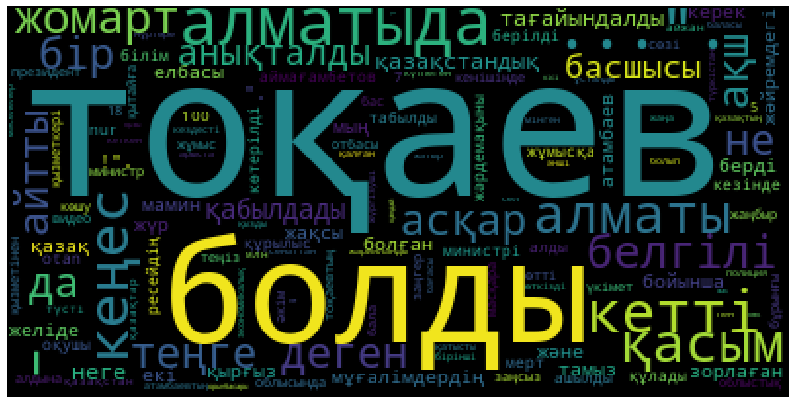

In [55]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Stemming

*An linguistic morphology and information retrieval, stemming is the process for reducing inflected (or sometimes derived) words to their stem, base or root form—generally a written word form. The stem need not be identical to the morphological root of the word; it is usually sufficient that related words map to the same stem, even if this stem is not in itself a valid root. Algorithms for stemming have been studied in computer science since the 1960s. Many search engines treat words with the same stem as synonyms as a kind of query expansion, a process called conflation.*

Stemming words is another common NLP technique to reduce topically similar words to their root. For example, “stemming,” “stemmer,” “stemmed,” all have similar meanings; stemming reduces those terms to “stem.” This is important for topic modeling, which would otherwise view those terms as separate entities and reduce their importance in the model. Stemming programs are commonly referred to as stemming algorithms or stemmers.

Like stopping, stemming is flexible and some methods are more aggressive. The Porter stemming algorithm is the most widely used method. To implement a Porter stemming algorithm, import the Porter Stemmer module from NLTK:

In [56]:
from nltk.stem.porter import PorterStemmer

In [57]:
porter_stemmer = PorterStemmer()

In [58]:
porter_stemmer.stem('dividing')

'divid'

In [60]:
porter_stemmer.stem('балалар')

'балалард'

## Lemmatization

Lemmatisation (or lemmatization) in linguistics, is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. In computational linguistics, lemmatisation is the algorithmic process of determining the lemma for a given word. Since the process may involve complex tasks such as understanding context and determining the part of speech of a word in a sentence (requiring, for example, knowledge of the grammar of a language) it can be a hard task to implement a lemmatiser for a new language.

In many languages, words appear in several inflected forms. For example, in English, the verb ‘to walk’ may appear as ‘walk’, ‘walked’, ‘walks’, ‘walking’. The base form, ‘walk’, that one might look up in a dictionary, is called the lemma for the word. The combination of the base form with the part of speech is often called the lexeme of the word.

Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

We will use a corpus to do the Lemmatization. Let us **download the wordnet corpora using nltk.download()**

In [61]:
from nltk.stem import WordNetLemmatizer

In [62]:
wordnet_lemmatizer = WordNetLemmatizer()

In [63]:
wordnet_lemmatizer.lemmatize('are')

'are'

In [64]:
wordnet_lemmatizer.lemmatize('is')

'is'

But we know that the root of `are` and `is` , is be. The reason why we see `are` and `is` as is , is because we
have to define them as verbs

In [65]:
wordnet_lemmatizer.lemmatize('dividing', pos = "v")

'divide'

In [66]:
wordnet_lemmatizer.lemmatize('is',pos='v')

'be'

In [67]:
def stem_title(data):
    return porter_stemmer.stem(data['title'])

In [68]:
def lemmatize_title(data):
    return wordnet_lemmatizer.lemmatize(data['title'])

In [69]:
df['stem'] = df.apply(stem_title,axis=1)

In [70]:
df.head()

,title,date,url,tokens,stem
0,Nur Otan-да екі аудандағы АӘК-тің таратылуында...,22:27 2019-08-17,https://kaz.zakon.kz/news/4981980-nur-otan-da-...,"nur,otan,да,екі,аудандағы,аәк,тің,таратылуында...",nur otan-да екі аудандағы аәк-тің таратылуында...
1,Асқар Мамин Арыс қаласын қалпына келтіру жұмыс...,18:16 2019-08-17,https://kaz.zakon.kz/news/4981971-as-ar-mamin-...,"асқар,мамин,арыс,қаласын,қалпына,келтіру,жұмыс...",асқар мамин арыс қаласын қалпына келтіру жұмыс...
2,Түркістанда шығыстық үлгідегі автобекет ашылды,15:25 2019-08-17,https://kaz.zakon.kz/news/4981963-t-rk-standa-...,"түркістанда,шығыстық,үлгідегі,автобекет,ашылды",түркістанда шығыстық үлгідегі автобекет ашылды
3,Бүгін арыстықтар 100 мың теңге жәрдемақыны алды,20:21 2019-08-16,https://kaz.zakon.kz/news/4981913-b-g-n-arysty...,"бүгін,арыстықтар,100,мың,теңге,жәрдемақыны,алды",бүгін арыстықтар 100 мың теңге жәрдемақыны алды
4,АҚШ-тың санкциялары Ресейдің мұнайына деген сұ...,17:54 2019-08-16,https://kaz.zakon.kz/news/4981898-a-sh-ty-sank...,"ақш,тың,санкциялары,ресейдің,мұнайына,деген,сұ...",ақш-тың санкциялары ресейдің мұнайына деген сұ...


In [71]:
df['lemma'] = df.apply(lemmatize_title,axis=1)

In [72]:
df.head()

,title,date,url,tokens,stem,lemma
0,Nur Otan-да екі аудандағы АӘК-тің таратылуында...,22:27 2019-08-17,https://kaz.zakon.kz/news/4981980-nur-otan-da-...,"nur,otan,да,екі,аудандағы,аәк,тің,таратылуында...",nur otan-да екі аудандағы аәк-тің таратылуында...,Nur Otan-да екі аудандағы АӘК-тің таратылуында...
1,Асқар Мамин Арыс қаласын қалпына келтіру жұмыс...,18:16 2019-08-17,https://kaz.zakon.kz/news/4981971-as-ar-mamin-...,"асқар,мамин,арыс,қаласын,қалпына,келтіру,жұмыс...",асқар мамин арыс қаласын қалпына келтіру жұмыс...,Асқар Мамин Арыс қаласын қалпына келтіру жұмыс...
2,Түркістанда шығыстық үлгідегі автобекет ашылды,15:25 2019-08-17,https://kaz.zakon.kz/news/4981963-t-rk-standa-...,"түркістанда,шығыстық,үлгідегі,автобекет,ашылды",түркістанда шығыстық үлгідегі автобекет ашылды,Түркістанда шығыстық үлгідегі автобекет ашылды
3,Бүгін арыстықтар 100 мың теңге жәрдемақыны алды,20:21 2019-08-16,https://kaz.zakon.kz/news/4981913-b-g-n-arysty...,"бүгін,арыстықтар,100,мың,теңге,жәрдемақыны,алды",бүгін арыстықтар 100 мың теңге жәрдемақыны алды,Бүгін арыстықтар 100 мың теңге жәрдемақыны алды
4,АҚШ-тың санкциялары Ресейдің мұнайына деген сұ...,17:54 2019-08-16,https://kaz.zakon.kz/news/4981898-a-sh-ty-sank...,"ақш,тың,санкциялары,ресейдің,мұнайына,деген,сұ...",ақш-тың санкциялары ресейдің мұнайына деген сұ...,АҚШ-тың санкциялары Ресейдің мұнайына деген сұ...


In [73]:
df.tail()

,title,date,url,tokens,stem,lemma
130,Тоқаев Сооронбай Жээнбековпен телефон арқылы с...,10:03 2019-08-09,https://kaz.zakon.kz/news/4980848-to-aev-sooro...,"тоқаев,сооронбай,жээнбековпен,телефон,сөйлесті",тоқаев сооронбай жээнбековпен телефон арқылы с...,Тоқаев Сооронбай Жээнбековпен телефон арқылы с...
131,Дайын отыр! Атамбаевты неге жығып бермеу керек,09:50 2019-08-09,https://kaz.zakon.kz/news/4980845-dayyn-otyr-a...,"дайын,отыр,атамбаевты,неге,жығып,бермеу,керек",дайын отыр! атамбаевты неге жығып бермеу керек,Дайын отыр! Атамбаевты неге жығып бермеу керек
132,Диана кайф. Жалаңаштанған қазақ қызы жұрттың ж...,09:31 2019-08-09,https://kaz.zakon.kz/news/4980839-diana-kayf-z...,"диана,кайф,жалаңаштанған,қазақ,қызы,жұрттың,жа...",диана кайф. жалаңаштанған қазақ қызы жұрттың ж...,Диана кайф. Жалаңаштанған қазақ қызы жұрттың ж...
133,Алматыда Toyota адам қағып кетті,09:18 2019-08-09,https://kaz.zakon.kz/news/4980835-almatyda-toy...,"алматыда,toyota,адам,қағып,кетті",алматыда toyota адам қағып кетті,Алматыда Toyota адам қағып кетті
134,Атамбаев өз еркімен берілді,08:59 2019-08-09,https://kaz.zakon.kz/news/4980831-atambaev-z-e...,"атамбаев,еркімен,берілді",атамбаев өз еркімен берілді,Атамбаев өз еркімен берілді


**Note: Stemming and Lemma in the context of Recall ** 

# Part of Speech (POS) tagging

https://displacy.spacy.io/displacy/index.html?full=Click+the+button+to+see+this+sentence+in+displaCy.

Let us go back to school. Schools commonly teach that there are 9 parts of speech in English: noun, verb, article, adjective, preposition, pronoun, adverb, conjunction, and interjection.

Part-of-speech tagging is one of the most important text analysis tasks used to classify words into their part-of-speech and label them according the tagset which is a collection of tags used for the pos tagging. Part-of-speech tagging also known as word classes or lexical categories. Here is the definition from wikipedia:

In corpus linguistics, part-of-speech tagging (POS tagging or POST), also called grammatical tagging or word-category disambiguation, is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition, as well as its context—i.e. relationship with adjacent and related words in a phrase, sentence, or paragraph. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.

Once performed by hand, POS tagging is now done in the context of computational linguistics, using algorithms which associate discrete terms, as well as hidden parts of speech, in accordance with a set of descriptive tags. POS-tagging algorithms fall into two distinctive groups: rule-based and stochastic. E. Brill’s tagger, one of the first and most widely used English POS-taggers, employs rule-based algorithms.

In [74]:
text = 'Calvin harris is a great musician'

In [75]:
text_tokens = nltk.wordpunct_tokenize(text)

In [76]:
text_tokens

['Calvin', 'harris', 'is', 'a', 'great', 'musician']

We will download **from nltk download averaged perceptron tagger** to do POS tagging

In [77]:
nltk.pos_tag(text_tokens)

[('Calvin', 'NNP'),
 ('harris', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('musician', 'NN')]

**Tag | Meaning	| English Examples**

Tag  | Meaning    | Examples
---- |----------- | --------------------
ADJ	 | adjective  | new, good, high, special, big, local
ADP	 | adposition |	on, of, at, with, by, into, under
ADV	 | adverb	  | really, already, still, early, now
CONJ | conjunction|	and, or, but, if, while, although
DET	 | determiner | the, a, some, most, every, no, which
NOUN | noun	      | year, home, costs, time, Africa
NUM	 | numeral	  | twenty-four, fourth, 1991, 14:24
PRT	 | particle	  | at, on, out, over per, that, up, with
PRON | pronoun	  | he, their, her, its, my, I, us
VERB | verb	      | is, say, told, given, playing, would
0	 | punctuation marks |	. , ; !
X	 | other	  | ersatz, esprit, dunno, gr8, univeristy


###  Let us generate POS tags for each title

In [78]:
def get_pos_tags(data):
    return nltk.pos_tag(nltk.wordpunct_tokenize(data['title']))

In [79]:
df['pos_tags'] = df.apply(get_pos_tags,axis=1)

In [80]:
df.head()

,title,date,url,tokens,stem,lemma,pos_tags
0,Nur Otan-да екі аудандағы АӘК-тің таратылуында...,22:27 2019-08-17,https://kaz.zakon.kz/news/4981980-nur-otan-da-...,"nur,otan,да,екі,аудандағы,аәк,тің,таратылуында...",nur otan-да екі аудандағы аәк-тің таратылуында...,Nur Otan-да екі аудандағы АӘК-тің таратылуында...,"[(Nur, NNP), (Otan, NNP), (-, :), (да, NN), (е..."
1,Асқар Мамин Арыс қаласын қалпына келтіру жұмыс...,18:16 2019-08-17,https://kaz.zakon.kz/news/4981971-as-ar-mamin-...,"асқар,мамин,арыс,қаласын,қалпына,келтіру,жұмыс...",асқар мамин арыс қаласын қалпына келтіру жұмыс...,Асқар Мамин Арыс қаласын қалпына келтіру жұмыс...,"[(Асқар, JJ), (Мамин, NNP), (Арыс, NNP), (қала..."
2,Түркістанда шығыстық үлгідегі автобекет ашылды,15:25 2019-08-17,https://kaz.zakon.kz/news/4981963-t-rk-standa-...,"түркістанда,шығыстық,үлгідегі,автобекет,ашылды",түркістанда шығыстық үлгідегі автобекет ашылды,Түркістанда шығыстық үлгідегі автобекет ашылды,"[(Түркістанда, JJ), (шығыстық, NNP), (үлгідегі..."
3,Бүгін арыстықтар 100 мың теңге жәрдемақыны алды,20:21 2019-08-16,https://kaz.zakon.kz/news/4981913-b-g-n-arysty...,"бүгін,арыстықтар,100,мың,теңге,жәрдемақыны,алды",бүгін арыстықтар 100 мың теңге жәрдемақыны алды,Бүгін арыстықтар 100 мың теңге жәрдемақыны алды,"[(Бүгін, JJ), (арыстықтар, $), (100, CD), (мың..."
4,АҚШ-тың санкциялары Ресейдің мұнайына деген сұ...,17:54 2019-08-16,https://kaz.zakon.kz/news/4981898-a-sh-ty-sank...,"ақш,тың,санкциялары,ресейдің,мұнайына,деген,сұ...",ақш-тың санкциялары ресейдің мұнайына деген сұ...,АҚШ-тың санкциялары Ресейдің мұнайына деген сұ...,"[(АҚШ, SYM), (-, :), (тың, NN), (санкциялары, ..."


## Entity Extraction

** Now using pos tags we can extract entities i.e find the primary focus of the sentence **

 <img src="img/entity_extraction.png" width=400>

### We already have POS tags - now all we need is chunking

The basic technique we will use for entity detection is chunking, which segments and labels multi-token sequences as illustrated in 2.1. The smaller boxes show the word-level tokenization and part-of-speech tagging, while the large boxes show higher-level chunking. Each of these larger boxes is called a chunk. Like tokenization, which omits whitespace, chunking usually selects a subset of the tokens. Also like tokenization, the pieces produced by a chunker do not overlap in the source text.

<img src="img/chunk-segmentation.png" width=400/>


Named Entity-Type | Examples
------------------| -------------------------
ORGANIZATION	| Georgia-Pacific Corp., WHO
PERSON	        | Eddy Bonte, President Obama
LOCATION	    | Murray River, Mount Everest
DATE	        | June, 2008-06-29
TIME	        | two fifty a m, 1:30 p.m.
MONEY	        | 175 million Canadian Dollars, GBP 10.40
PERCENT	        |  twenty pct, 18.75 %
FACILITY	    | Washington Monument, Stonehenge
GPE	            | South East Asia, Midlothian

To do the entity identification, we will **download the maxent chunker and words corpora **

In [81]:
df.pos_tags[0]

[('Nur', 'NNP'),
 ('Otan', 'NNP'),
 ('-', ':'),
 ('да', 'NN'),
 ('екі', 'JJ'),
 ('аудандағы', 'NNP'),
 ('АӘК', 'NNP'),
 ('-', ':'),
 ('тің', 'NN'),
 ('таратылуындағы', 'JJ'),
 ('заң', 'NNP'),
 ('бұзушылықтар', 'NNP'),
 ('қаралды', 'NN')]

In [82]:
ne_tree = nltk.ne_chunk(df.pos_tags[0],binary=True)
# ne_tree

In [ ]:
# for x in ne_tree:
#    print(x)

In [ ]:
# we want only the NE ones and when print the type we see that it is a tree
# so we need to iterate over the tree and get the NE

In [83]:
for x in ne_tree:
    print(type(x),x)
    if type(x) == nltk.tree.Tree:
        if(x.label()) == 'NE':
            print(x)
        

<class 'nltk.tree.Tree'> (NE Nur/NNP Otan/NNP)
(NE Nur/NNP Otan/NNP)
<class 'tuple'> ('-', ':')
<class 'tuple'> ('да', 'NN')
<class 'tuple'> ('екі', 'JJ')
<class 'tuple'> ('аудандағы', 'NNP')
<class 'nltk.tree.Tree'> (NE АӘК/NNP)
(NE АӘК/NNP)
<class 'tuple'> ('-', ':')
<class 'tuple'> ('тің', 'NN')
<class 'tuple'> ('таратылуындағы', 'JJ')
<class 'tuple'> ('заң', 'NNP')
<class 'tuple'> ('бұзушылықтар', 'NNP')
<class 'tuple'> ('қаралды', 'NN')


In [84]:
def get_entities(row):
    entities=[]
    chunked_tree = nltk.ne_chunk(row.pos_tags,binary=True)
    for nodes in chunked_tree:
        if type(nodes) == nltk.tree.Tree:
            if(nodes.label()) == 'NE':
                print("Before zip",nodes.leaves())
                zipped_list = list(zip(*nodes.leaves()))
                print("After zip",zipped_list)
                entities.append(' '.join(zipped_list[0]))
    return entities

In [85]:
df['named_entities'] = df.apply(get_entities,axis=1)

Before zip [('Nur', 'NNP'), ('Otan', 'NNP')]
After zip [('Nur', 'Otan'), ('NNP', 'NNP')]
Before zip [('АӘК', 'NNP')]
After zip [('АӘК',), ('NNP',)]
Before zip [('Асқар', 'JJ'), ('Мамин', 'NNP'), ('Арыс', 'NNP')]
After zip [('Асқар', 'Мамин', 'Арыс'), ('JJ', 'NNP', 'NNP')]
Before zip [('Түркістанда', 'JJ')]
After zip [('Түркістанда',), ('JJ',)]
Before zip [('АҚШ', 'SYM')]
After zip [('АҚШ',), ('SYM',)]
Before zip [('Ресейдің', 'NNP')]
After zip [('Ресейдің',), ('NNP',)]
Before zip [('Елбасы', 'JJ')]
After zip [('Елбасы',), ('JJ',)]
Before zip [('Дала', 'JJ')]
After zip [('Дала',), ('JJ',)]
Before zip [('Білім', 'JJ')]
After zip [('Білім',), ('JJ',)]
Before zip [('Мұғалімдердің', 'JJ')]
After zip [('Мұғалімдердің',), ('JJ',)]
Before zip [('Алматыда', 'JJ')]
After zip [('Алматыда',), ('JJ',)]
Before zip [('Алматыда', 'JJ')]
After zip [('Алматыда',), ('JJ',)]
Before zip [('СҚО', 'SYM')]
After zip [('СҚО',), ('SYM',)]
Before zip [('Тамыз', 'JJ')]
After zip [('Тамыз',), ('JJ',)]
Before zip [

Before zip [('Үкімет', 'JJ')]
After zip [('Үкімет',), ('JJ',)]
Before zip [('Сыртқы', 'JJ')]
After zip [('Сыртқы',), ('JJ',)]
Before zip [('Батыс', 'JJ'), ('Қазақстанда', 'NNP')]
After zip [('Батыс', 'Қазақстанда'), ('JJ', 'NNP')]
Before zip [('Әлемдік', 'JJ')]
After zip [('Әлемдік',), ('JJ',)]
Before zip [('Қасым', 'SYM')]
After zip [('Қасым',), ('SYM',)]
Before zip [('Жомарт', 'NN'), ('Тоқаев', 'JJ'), ('Қытайға', 'NNP')]
After zip [('Жомарт', 'Тоқаев', 'Қытайға'), ('NN', 'JJ', 'NNP')]
Before zip [('Кісі', 'JJ')]
After zip [('Кісі',), ('JJ',)]
Before zip [('Қазақстандық', 'JJ')]
After zip [('Қазақстандық',), ('JJ',)]
Before zip [('Атамбаев', 'JJ')]
After zip [('Атамбаев',), ('JJ',)]
Before zip [('Саудагерлер', 'JJ')]
After zip [('Саудагерлер',), ('JJ',)]
Before zip [('Асанәлі', 'JJ'), ('Әшімов', 'NNP')]
After zip [('Асанәлі', 'Әшімов'), ('JJ', 'NNP')]
Before zip [('Қаперсіз', 'JJ')]
After zip [('Қаперсіз',), ('JJ',)]
Before zip [('Тоқаев', 'JJ'), ('Сооронбай', 'NNP'), ('Жээнбековпен',

In [86]:
df.head()

,title,date,url,tokens,stem,lemma,pos_tags,named_entities
0,Nur Otan-да екі аудандағы АӘК-тің таратылуында...,22:27 2019-08-17,https://kaz.zakon.kz/news/4981980-nur-otan-da-...,"nur,otan,да,екі,аудандағы,аәк,тің,таратылуында...",nur otan-да екі аудандағы аәк-тің таратылуында...,Nur Otan-да екі аудандағы АӘК-тің таратылуында...,"[(Nur, NNP), (Otan, NNP), (-, :), (да, NN), (е...","[Nur Otan, АӘК]"
1,Асқар Мамин Арыс қаласын қалпына келтіру жұмыс...,18:16 2019-08-17,https://kaz.zakon.kz/news/4981971-as-ar-mamin-...,"асқар,мамин,арыс,қаласын,қалпына,келтіру,жұмыс...",асқар мамин арыс қаласын қалпына келтіру жұмыс...,Асқар Мамин Арыс қаласын қалпына келтіру жұмыс...,"[(Асқар, JJ), (Мамин, NNP), (Арыс, NNP), (қала...",[Асқар Мамин Арыс]
2,Түркістанда шығыстық үлгідегі автобекет ашылды,15:25 2019-08-17,https://kaz.zakon.kz/news/4981963-t-rk-standa-...,"түркістанда,шығыстық,үлгідегі,автобекет,ашылды",түркістанда шығыстық үлгідегі автобекет ашылды,Түркістанда шығыстық үлгідегі автобекет ашылды,"[(Түркістанда, JJ), (шығыстық, NNP), (үлгідегі...",[Түркістанда]
3,Бүгін арыстықтар 100 мың теңге жәрдемақыны алды,20:21 2019-08-16,https://kaz.zakon.kz/news/4981913-b-g-n-arysty...,"бүгін,арыстықтар,100,мың,теңге,жәрдемақыны,алды",бүгін арыстықтар 100 мың теңге жәрдемақыны алды,Бүгін арыстықтар 100 мың теңге жәрдемақыны алды,"[(Бүгін, JJ), (арыстықтар, $), (100, CD), (мың...",[]
4,АҚШ-тың санкциялары Ресейдің мұнайына деген сұ...,17:54 2019-08-16,https://kaz.zakon.kz/news/4981898-a-sh-ty-sank...,"ақш,тың,санкциялары,ресейдің,мұнайына,деген,сұ...",ақш-тың санкциялары ресейдің мұнайына деген сұ...,АҚШ-тың санкциялары Ресейдің мұнайына деген сұ...,"[(АҚШ, SYM), (-, :), (тың, NN), (санкциялары, ...","[АҚШ, Ресейдің]"


** Now that we have entities, we can understand the statements better **

In [87]:
df.tail()

,title,date,url,tokens,stem,lemma,pos_tags,named_entities
130,Тоқаев Сооронбай Жээнбековпен телефон арқылы с...,10:03 2019-08-09,https://kaz.zakon.kz/news/4980848-to-aev-sooro...,"тоқаев,сооронбай,жээнбековпен,телефон,сөйлесті",тоқаев сооронбай жээнбековпен телефон арқылы с...,Тоқаев Сооронбай Жээнбековпен телефон арқылы с...,"[(Тоқаев, JJ), (Сооронбай, NNP), (Жээнбековпен...",[Тоқаев Сооронбай Жээнбековпен]
131,Дайын отыр! Атамбаевты неге жығып бермеу керек,09:50 2019-08-09,https://kaz.zakon.kz/news/4980845-dayyn-otyr-a...,"дайын,отыр,атамбаевты,неге,жығып,бермеу,керек",дайын отыр! атамбаевты неге жығып бермеу керек,Дайын отыр! Атамбаевты неге жығып бермеу керек,"[(Дайын, JJ), (отыр, NN), (!, .), (Атамбаевты,...",[Дайын]
132,Диана кайф. Жалаңаштанған қазақ қызы жұрттың ж...,09:31 2019-08-09,https://kaz.zakon.kz/news/4980839-diana-kayf-z...,"диана,кайф,жалаңаштанған,қазақ,қызы,жұрттың,жа...",диана кайф. жалаңаштанған қазақ қызы жұрттың ж...,Диана кайф. Жалаңаштанған қазақ қызы жұрттың ж...,"[(Диана, JJ), (кайф, NNP), (., .), (Жалаңаштан...",[Диана]
133,Алматыда Toyota адам қағып кетті,09:18 2019-08-09,https://kaz.zakon.kz/news/4980835-almatyda-toy...,"алматыда,toyota,адам,қағып,кетті",алматыда toyota адам қағып кетті,Алматыда Toyota адам қағып кетті,"[(Алматыда, JJ), (Toyota, NNP), (адам, NNP), (...",[Алматыда Toyota]
134,Атамбаев өз еркімен берілді,08:59 2019-08-09,https://kaz.zakon.kz/news/4980831-atambaev-z-e...,"атамбаев,еркімен,берілді",атамбаев өз еркімен берілді,Атамбаев өз еркімен берілді,"[(Атамбаев, JJ), (өз, NNP), (еркімен, NNP), (б...",[Атамбаев]


In [88]:
df.to_csv('news_explore.csv',index=False)